In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Company_Data.csv')

In [3]:
data1 = data.copy()

In [4]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
data1.shape

(400, 11)

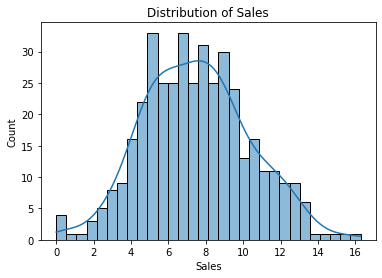

In [10]:
#visualize sales
sns.histplot(data1['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()

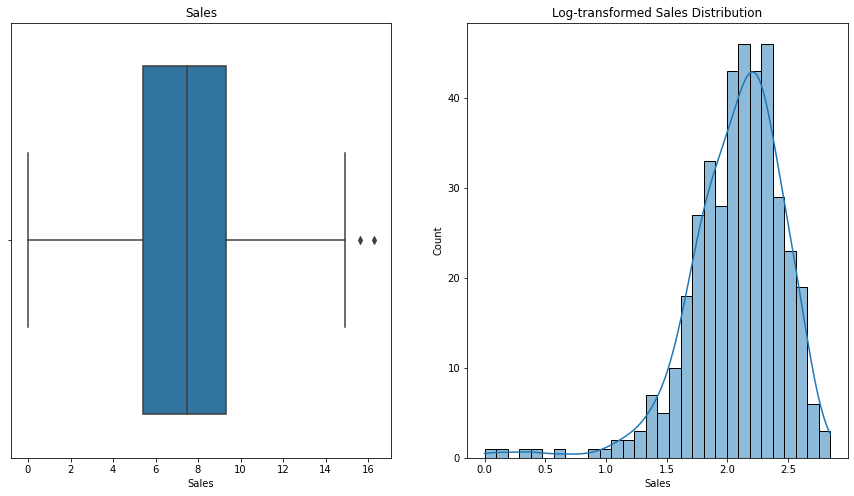

In [11]:
#outliers
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = data1['Sales'])
plt.title('Sales')

#Log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data1['Sales']), bins=30, kde=True)
plt.title('Log-transformed Sales Distribution')
plt.show()

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


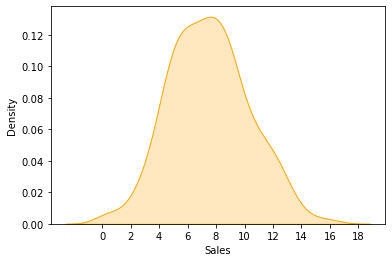

In [12]:
print('Skew: {}'.format(data1['Sales'].skew()))
print('Kurtosis: {}'.format(data1['Sales'].kurtosis()))
a = sns.kdeplot(data1['Sales'], shade=True, color='orange')
plt.xticks([i for i in range(0, 20, 2)])
plt.show()

In [13]:
cols = data1.select_dtypes(exclude='object').columns.tolist()

In [14]:
skewness = data1.skew()
Kurtosis = data1.kurtosis()

skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': Kurtosis})
print(skew_kurt_df)

             Skewness  Kurtosis
Sales        0.185560 -0.080877
CompPrice   -0.042755  0.041666
Income       0.049444 -1.085289
Advertising  0.639586 -0.545118
Population  -0.051227 -1.202318
Price       -0.125286  0.451885
Age         -0.077182 -1.134392
Education    0.044007 -1.298332


In [15]:
data1.groupby(['ShelveLoc', 'Urban', 'US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

### Label Encoding

In [16]:
label_encoder = LabelEncoder()
data1['ShelveLoc'] = label_encoder.fit_transform(data1['ShelveLoc'])
data1['Urban'] = label_encoder.fit_transform(data1['Urban'])
data1['US'] = label_encoder.fit_transform(data1['US'])

In [17]:
data1['ShelveLoc'] = data1['ShelveLoc'].astype('category')
data1['Urban'] = data1['Urban'].astype('category')
data1['US'] = data1['US'].astype('category')

In [18]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


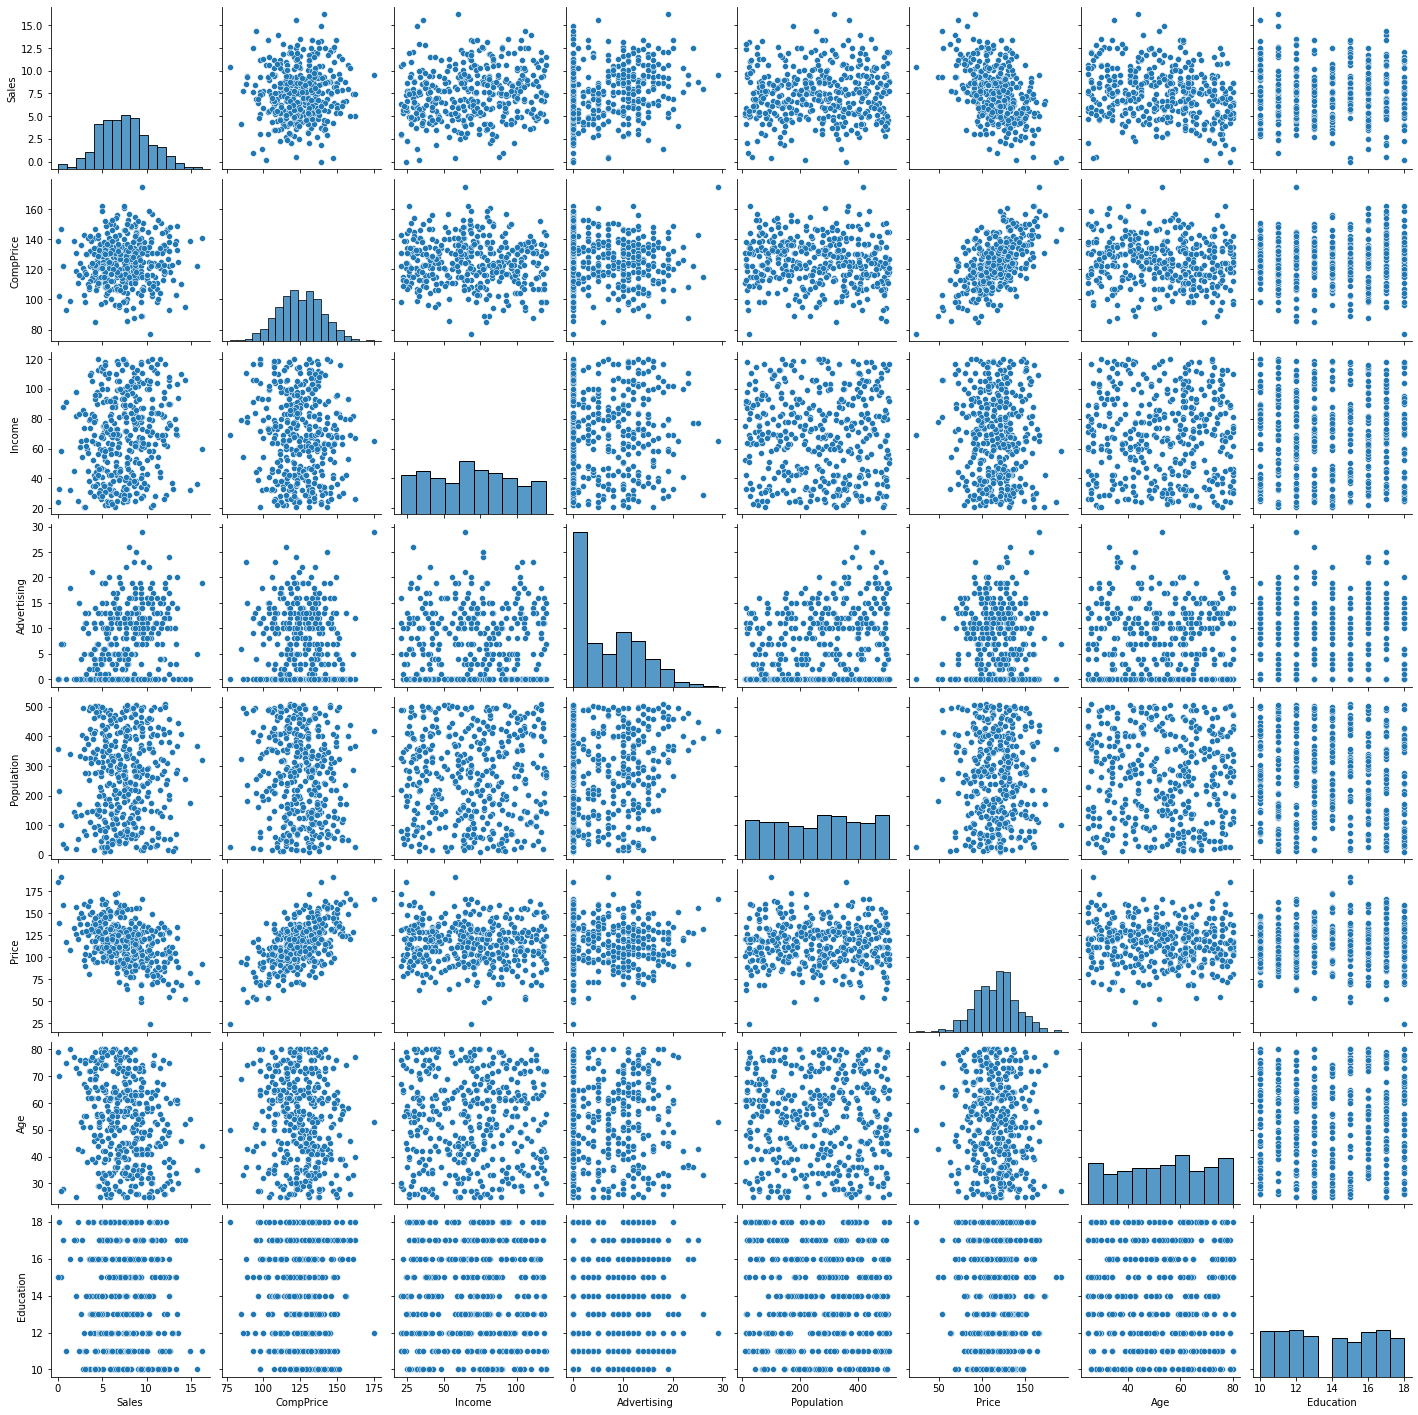

In [20]:
sns.pairplot(data1)

In [21]:
data1 = pd.get_dummies(data1, columns = ['ShelveLoc', 'Urban', 'US'])

In [22]:
p = data1.corr()
p

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_0,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_1,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


<AxesSubplot:>

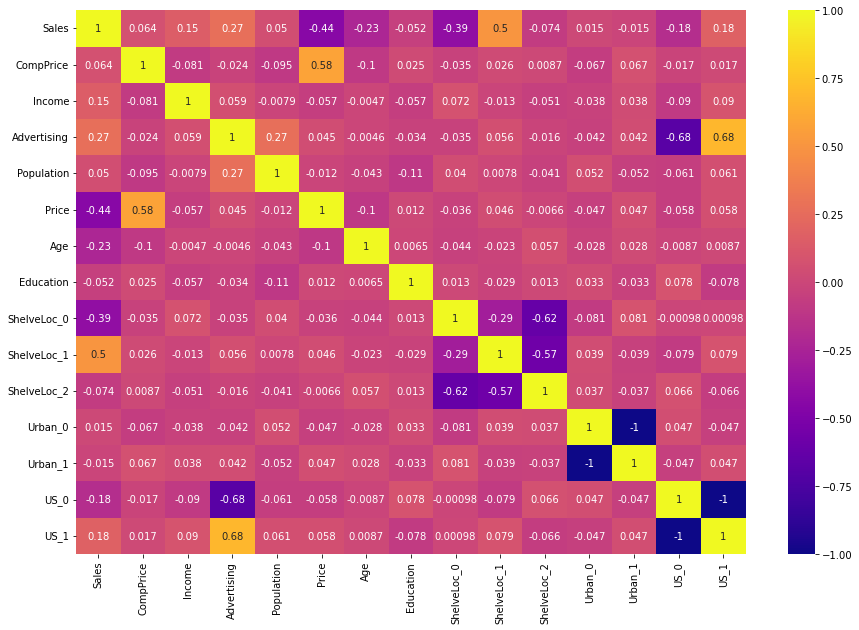

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(p, annot=True, cmap = 'plasma')

## Decision Tree

In [24]:
data1['sales'] = 'small'
data1.loc[data1['Sales']>7.49, 'sales'] = 'large'
data1.drop(['Sales'], axis=1, inplace=True)

In [25]:
X = data1.iloc[:, 1:14]
Y = data1.iloc[:, 14]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 32, stratify = Y)

In [27]:
Y_train.value_counts()

small    151
large    149
Name: sales, dtype: int64

In [28]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
train_pred = model.predict(X_train)

In [30]:
accuracy_score(Y_train, train_pred)

1.0

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, train_pred)

array([[149,   0],
       [  0, 151]], dtype=int64)

In [32]:
test_pred = model.predict(X_test)

In [33]:
accuracy_score(Y_test, test_pred)

0.67

In [34]:
confusion_matrix(Y_test, test_pred)

array([[33, 17],
       [16, 34]], dtype=int64)

In [35]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_pred})

In [36]:
df

,Actual,Predicted
103,small,small
273,large,large
123,large,small
343,small,large
32,small,large
...,...,...
213,large,small
146,small,small
9,small,small
355,small,small


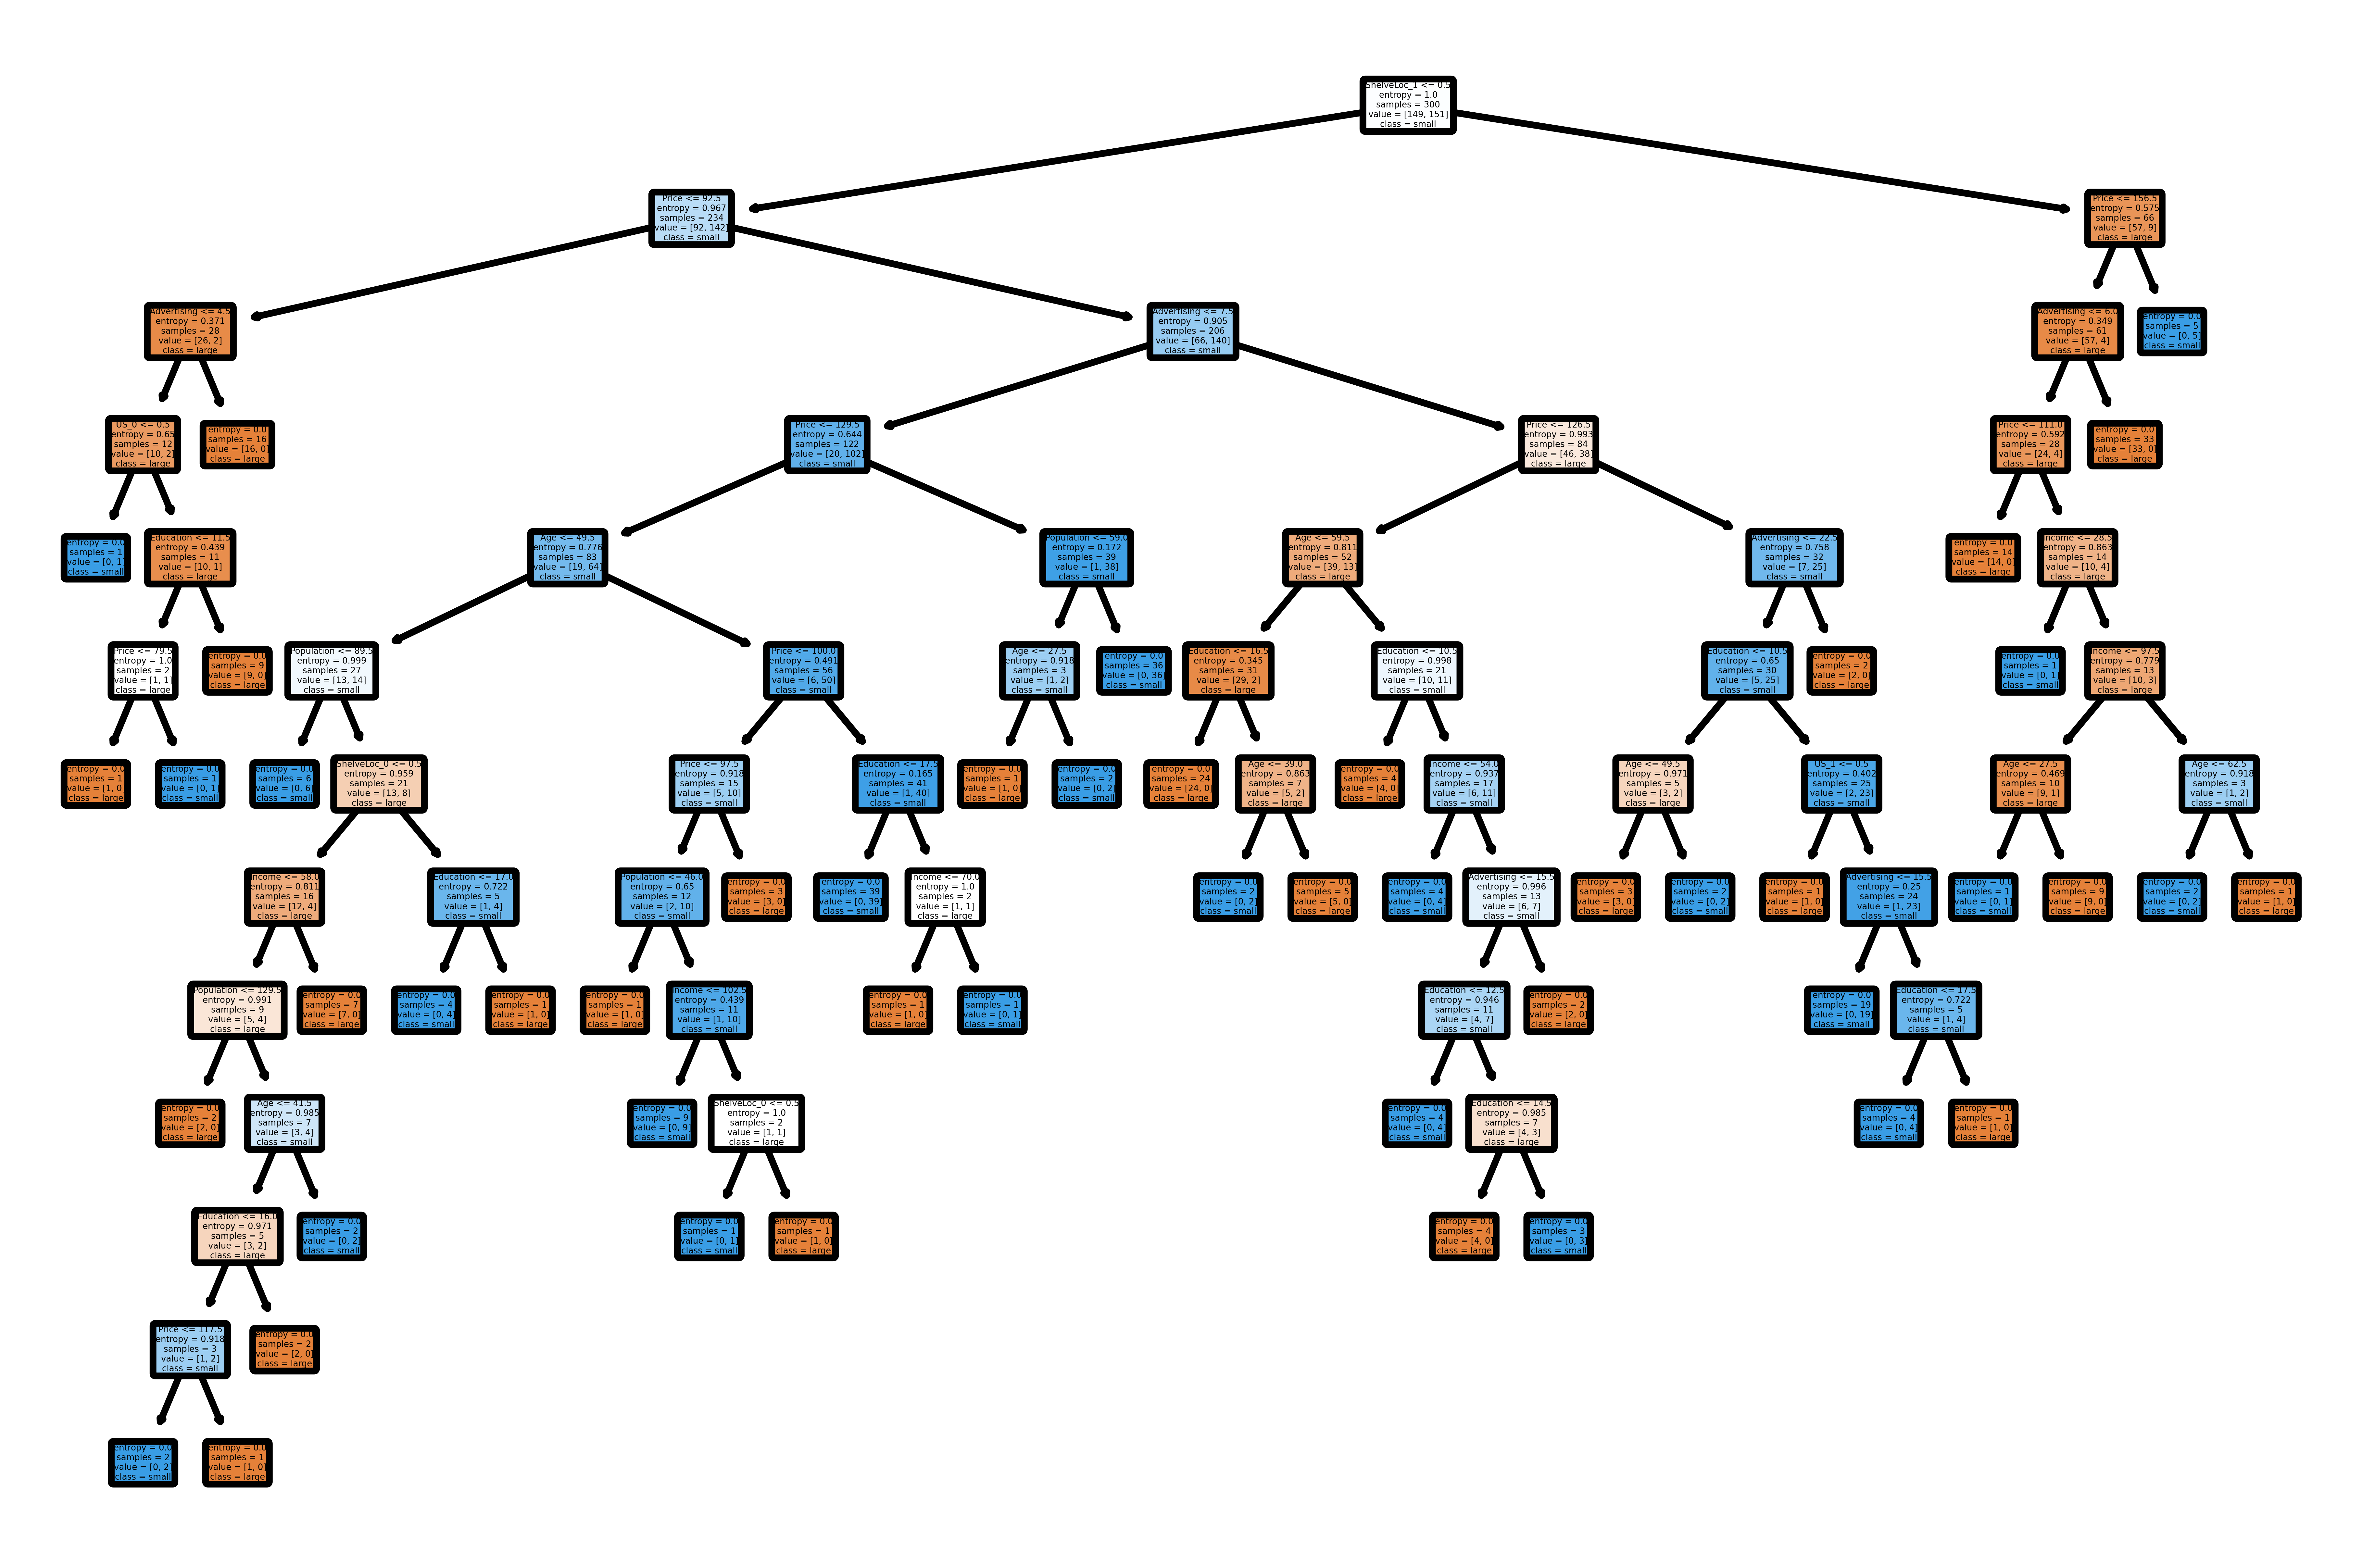

In [37]:
plt.figure(dpi=1500)
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()